<a href="https://colab.research.google.com/github/Shrey327/Machine_Learning/blob/main/CO2_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
df = pd.read_csv("CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (7385, 12)

Missing Values:
 Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [ ]:
df = df.drop(['Model', 'Make', 'Transmission'], axis=1)

In [ ]:
df.head()

,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,COMPACT,2.0,4,Z,9.9,6.7,8.5,33,196
1,COMPACT,2.4,4,Z,11.2,7.7,9.6,29,221
2,COMPACT,1.5,4,Z,6.0,5.8,5.9,48,136
3,SUV - SMALL,3.5,6,Z,12.7,9.1,11.1,25,255
4,SUV - SMALL,3.5,6,Z,12.1,8.7,10.6,27,244


In [ ]:
num_unique_vehicle_class = df['Vehicle Class'].nunique()
print(f"Number of unique values in 'Vehicle Class': {num_unique_vehicle_class}")

Number of unique values in 'Vehicle Class': 16


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Vehicle Class'] = label_encoder.fit_transform(df['Vehicle Class'])
df['Fuel Type'] = label_encoder.fit_transform(df['Fuel Type'])

In [ ]:

# df['Model'] = label_encoder.fit_transform(df['Model'])

In [ ]:
df

,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,2.0,4,4,9.9,6.7,8.5,33,196
1,0,2.4,4,4,11.2,7.7,9.6,29,221
2,0,1.5,4,4,6.0,5.8,5.9,48,136
3,11,3.5,6,4,12.7,9.1,11.1,25,255
4,11,3.5,6,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...
7380,11,2.0,4,4,10.7,7.7,9.4,30,219
7381,11,2.0,4,4,11.2,8.3,9.9,29,232
7382,11,2.0,4,4,11.7,8.6,10.3,27,240
7383,12,2.0,4,4,11.2,8.3,9.9,29,232


In [ ]:
df.corr()

,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Vehicle Class,1.000000,0.142704,0.105978,-0.033560,0.240941,0.329828,0.274388,-0.277606,0.286468
Engine Size(L),0.142704,1.000000,0.927653,0.058296,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.105978,0.927653,1.000000,0.125175,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Type,-0.033560,0.058296,0.125175,1.000000,-0.075605,-0.129812,-0.095539,-0.016880,0.100306
Fuel Consumption City (L/100 km),0.240941,0.831379,0.800702,-0.075605,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.329828,0.761526,0.715252,-0.129812,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.274388,0.817060,0.780534,-0.095539,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.277606,-0.757854,-0.719321,-0.016880,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.286468,0.851145,0.832644,0.100306,0.919592,0.883536,0.918052,-0.907426,1.000000


In [ ]:
columns = ['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Fuel Type',
           'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
           'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
           'CO2 Emissions(g/km)']

In [ ]:
X = df.drop('CO2 Emissions(g/km)', axis=1)
y = df['CO2 Emissions(g/km)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def build_model(input_dim):
    model = Sequential([
        # Dense(128, activation='relu', input_shape=(input_dim,)),
        # BatchNormalization(),
        # Dropout(0.3),

        # Dense(64, activation='relu'),
        # BatchNormalization(),
        # Dropout(0.3),

        # Dense(32, activation='relu'),
        # BatchNormalization(),
        # Dropout(0.2),

        Dense(8, activation='relu',input_shape=(input_dim,)),
        BatchNormalization(),
        # Dropout(0.3),
        Dense(8, activation='relu'),
        BatchNormalization(),
        # Dropout(0.3),
        # Dense(2, activation='relu'),

        Dense(1)
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])
    return model

In [ ]:
model = build_model(X_train_scaled.shape[1])

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217 (868.00 B)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 32 (128.00 B)

In [ ]:
callbacks = [
    # Stop training when validation loss stops improving
    EarlyStopping(
        monitor='val_loss',
        patience=30,
        restore_best_weights=True,
        verbose=1
    ),
    # Reduce learning rate when validation loss plateaus
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=15,
        min_lr=1e-6,
        verbose=1
    ),
    # Checkpoint callback (note the separate declaration)
    ModelCheckpoint(
        'best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        mode='min'
    )
]

In [ ]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=500,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.5831 - mae: 5.4750 - mse: 54.5831 - val_loss: 26.0160 - val_mae: 2.8096 - val_mse: 26.0160 - learning_rate: 1.2500e-04
Epoch 2/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.3563 - mae: 5.8279 - mse: 54.3563 - val_loss: 25.9549 - val_mae: 2.7716 - val_mse: 25.9549 - learning_rate: 1.2500e-04
Epoch 3/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.1296 - mae: 4.9252 - mse: 47.1296 - val_loss: 25.8471 - val_mae: 2.7688 - val_mse: 25.8471 - learning_rate: 1.2500e-04
Epoch 4/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.7930 - mae: 4.7395 - mse: 40.7930 - val_loss: 26.1126 - val_mae: 2.8052 - val_mse: 26.1126 - learning_rate: 1.2500e-04
Epoch 5/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.4804 - mae: 5.1243 - mse: 47.4804 - val_loss: 25.7749 - val_mae: 2.7582 - val_mse: 25.7749 - learning_rate: 1.2500e-04
Epoch 6/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.8423 - mae: 5.2921 - mse: 47.8423

Missing Values:
Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions(g/km)                 0
dtype: int64

Linear Regression Results:
Mean Squared Error: 421.86
Mean Absolute Error: 13.51
R-squared Score: 0.8774


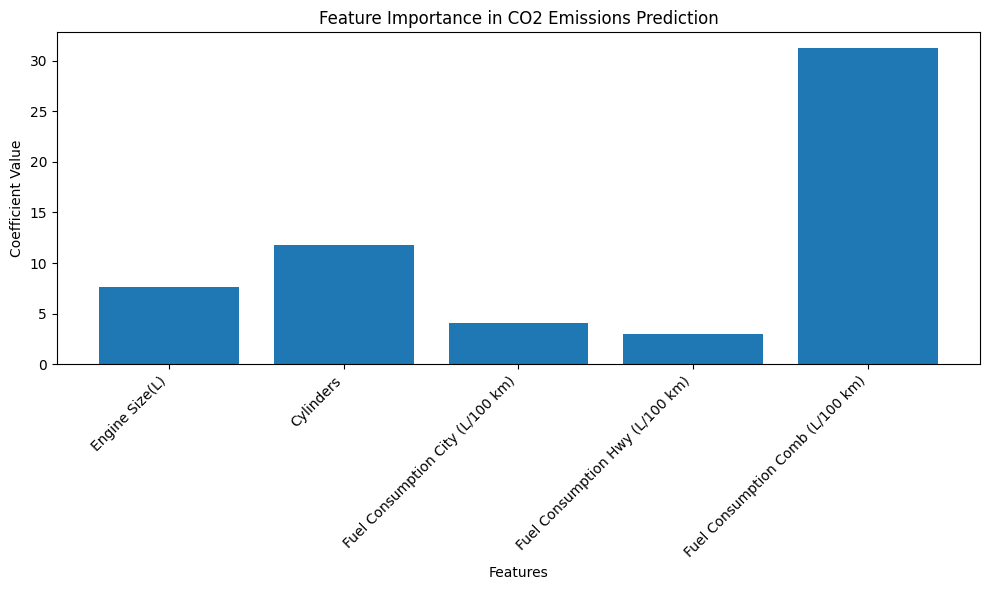

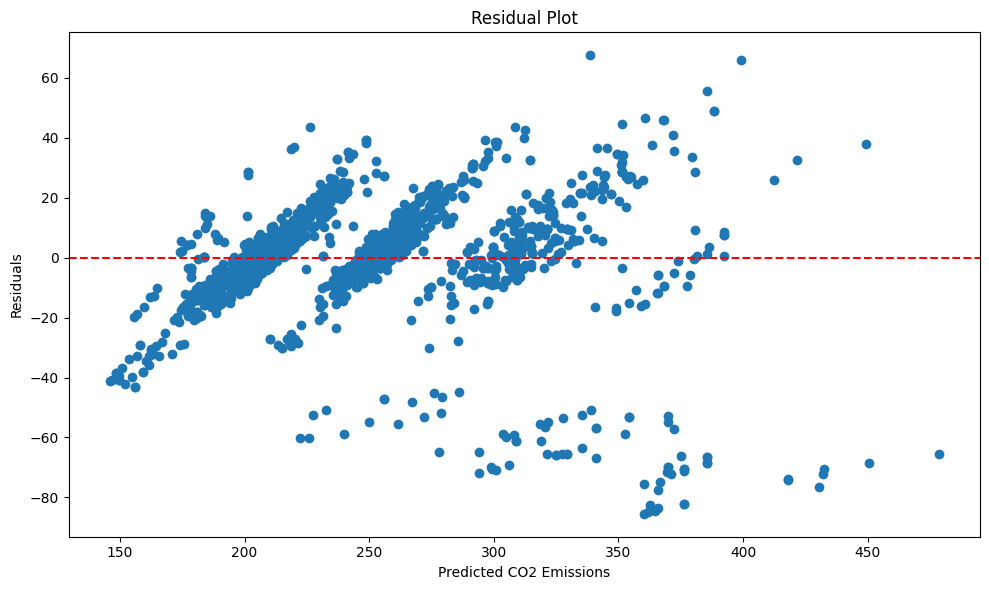


Ridge Regression Results:
Mean Squared Error: 421.88
Mean Absolute Error: 13.51
R-squared Score: 0.8773


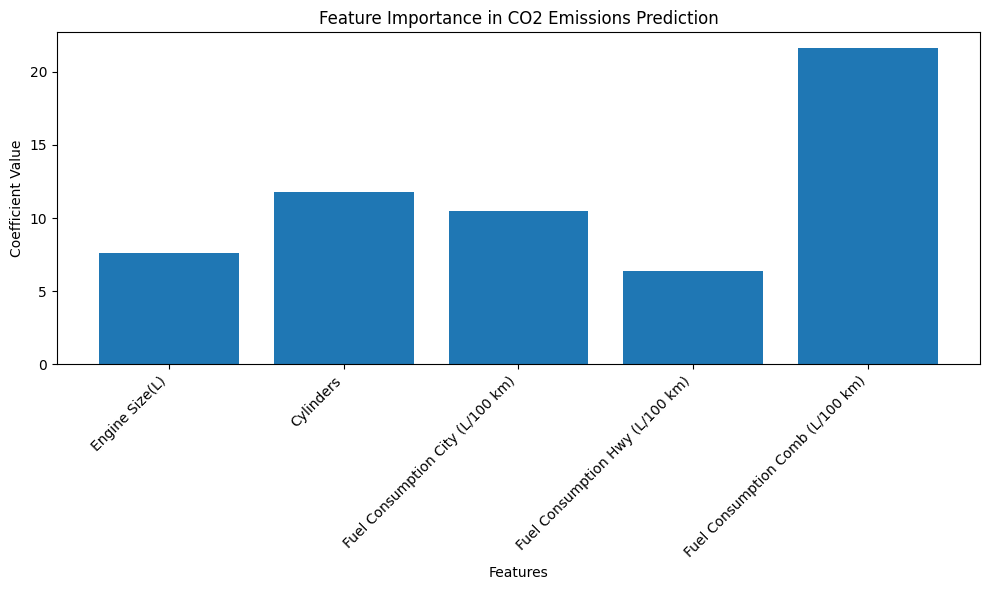

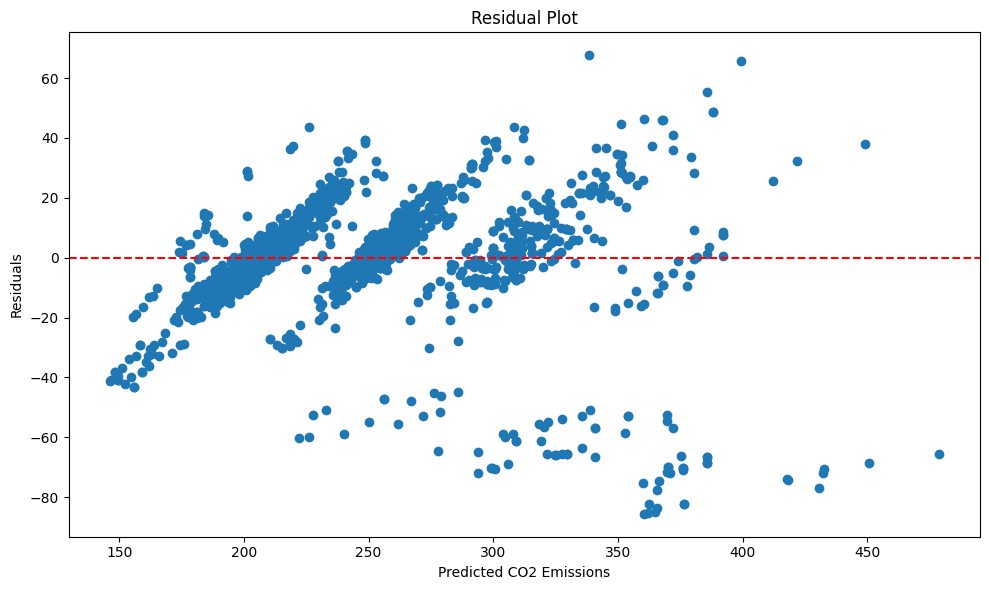


Lasso Regression Results:
Mean Squared Error: 423.57
Mean Absolute Error: 13.72
R-squared Score: 0.8769


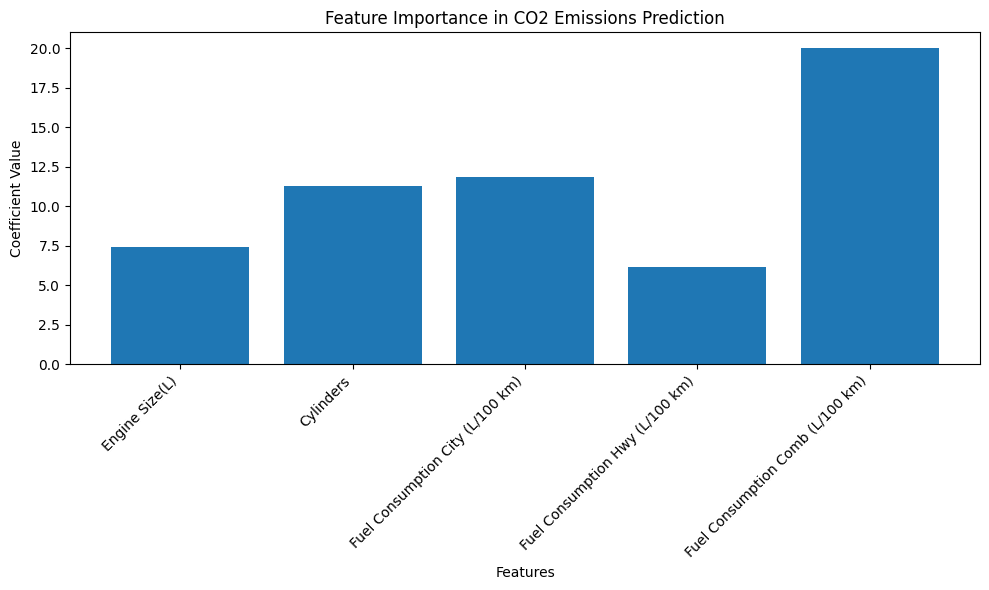

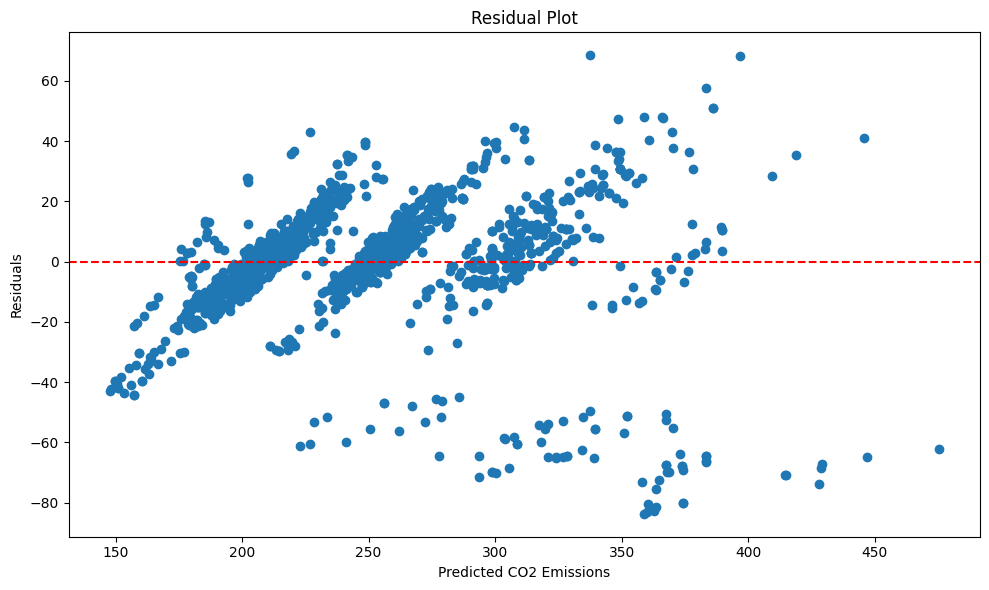

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def prepare_data(df):

    features = [
        'Engine Size(L)',
        'Cylinders',
        'Fuel Consumption City (L/100 km)',
        'Fuel Consumption Hwy (L/100 km)',
        'Fuel Consumption Comb (L/100 km)'
    ]


    print("Missing Values:")
    print(df[features + ['CO2 Emissions(g/km)']].isnull().sum())

    df_cleaned = df.dropna(subset=features + ['CO2 Emissions(g/km)'])

    X = df_cleaned[features]
    y = df_cleaned['CO2 Emissions(g/km)']


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, features


def train_and_evaluate_linear_model(X_train, X_test, y_train, y_test, model_type='linear'):
    # Choose model
    if model_type == 'linear':
        model = LinearRegression()
        model_name = "Linear Regression"
    elif model_type == 'ridge':
        model = Ridge(alpha=1.0)
        model_name = "Ridge Regression"
    elif model_type == 'lasso':
        model = Lasso(alpha=1.0)
        model_name = "Lasso Regression"
    else:
        raise ValueError("Invalid model type. Choose 'linear', 'ridge', or 'lasso'.")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name} Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared Score: {r2:.4f}")

    return model, y_pred

def plot_feature_importance(model, feature_names):
    plt.figure(figsize=(10, 6))


    coefficients = model.coef_


    plt.bar(feature_names, coefficients)
    plt.title('Feature Importance in CO2 Emissions Prediction')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.title('Residual Plot')
    plt.xlabel('Predicted CO2 Emissions')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()


def main(df):

    X_train, X_test, y_train, y_test, scaler, features = prepare_data(df)


    models = ['linear', 'ridge', 'lasso']
    results = {}

    for model_type in models:
        model, y_pred = train_and_evaluate_linear_model(
            X_train, X_test, y_train, y_test, model_type
        )


        plot_feature_importance(model, features)


        plot_residuals(y_test, y_pred)

        results[model_type] = {
            'model': model,
            'predictions': y_pred
        }

    return results, scaler, features


results, scaler, features = main(df)


--- Degree 1 Polynomial Regression ---
Missing Values:
Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions(g/km)                 0
dtype: int64

Polynomial Regression (Degree 1) Results:
Mean Squared Error: 421.86
Mean Absolute Error: 13.51
R-squared Score: 0.8774

Cross-Validation Results:
RMSE Scores: [26.06161508 20.72621885 18.13367185 20.61335833 17.98271066]
Mean CV RMSE: 20.70 (+/- 5.85)


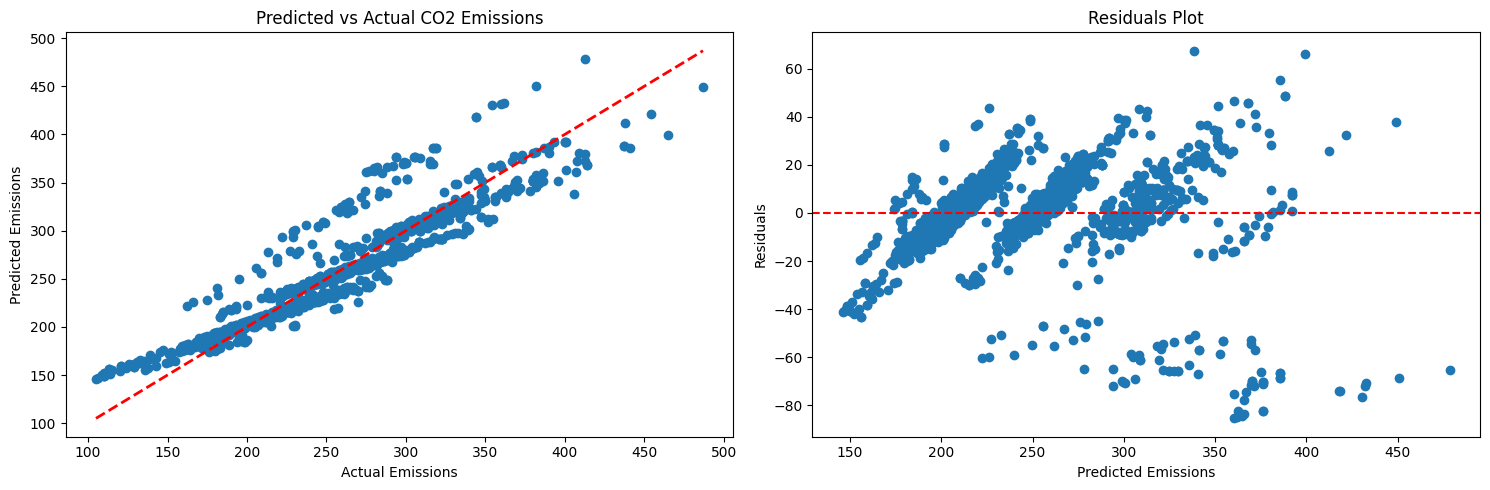


--- Degree 2 Polynomial Regression ---
Missing Values:
Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions(g/km)                 0
dtype: int64

Polynomial Regression (Degree 2) Results:
Mean Squared Error: 271.72
Mean Absolute Error: 9.06
R-squared Score: 0.9210

Cross-Validation Results:
RMSE Scores: [21.61814918 17.22963817 13.7342615  16.44723643 12.60552465]
Mean CV RMSE: 16.33 (+/- 6.29)


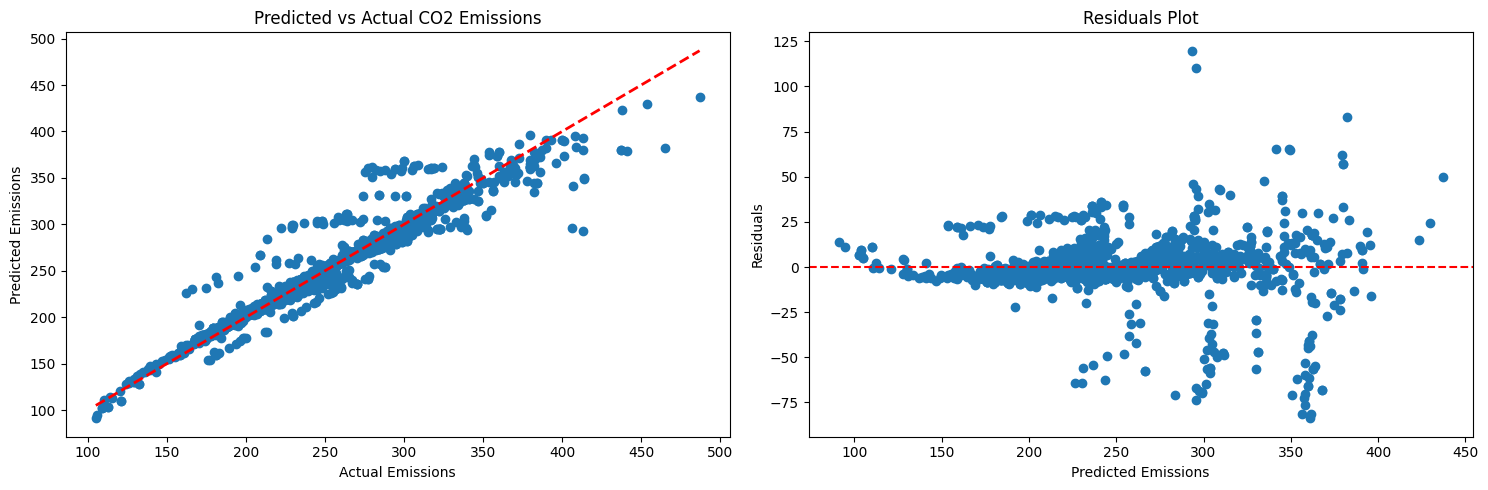


--- Degree 3 Polynomial Regression ---
Missing Values:
Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions(g/km)                 0
dtype: int64

Polynomial Regression (Degree 3) Results:
Mean Squared Error: 220.79
Mean Absolute Error: 9.11
R-squared Score: 0.9358

Cross-Validation Results:
RMSE Scores: [19.30815977 15.67400273 13.09277443 14.59115772 12.39886892]
Mean CV RMSE: 15.01 (+/- 4.86)


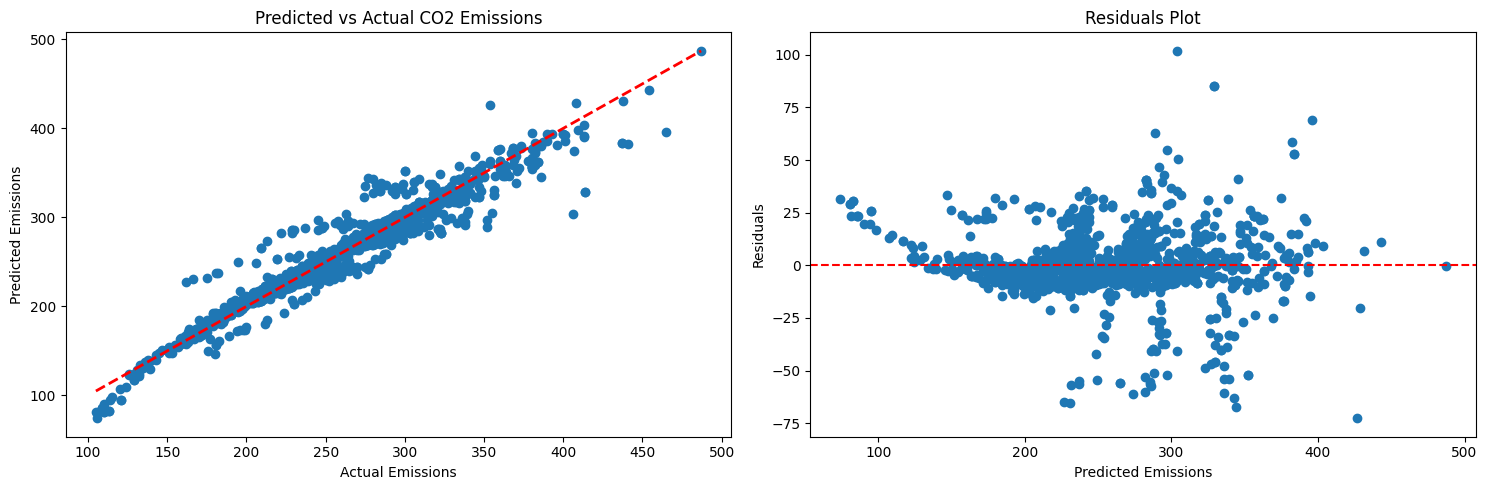


--- Degree 4 Polynomial Regression ---
Missing Values:
Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions(g/km)                 0
dtype: int64

Polynomial Regression (Degree 4) Results:
Mean Squared Error: 170.38
Mean Absolute Error: 7.04
R-squared Score: 0.9505

Cross-Validation Results:
RMSE Scores: [20.0386759  13.88887646 12.04293028 17.6136769  13.16745892]
Mean CV RMSE: 15.35 (+/- 6.00)


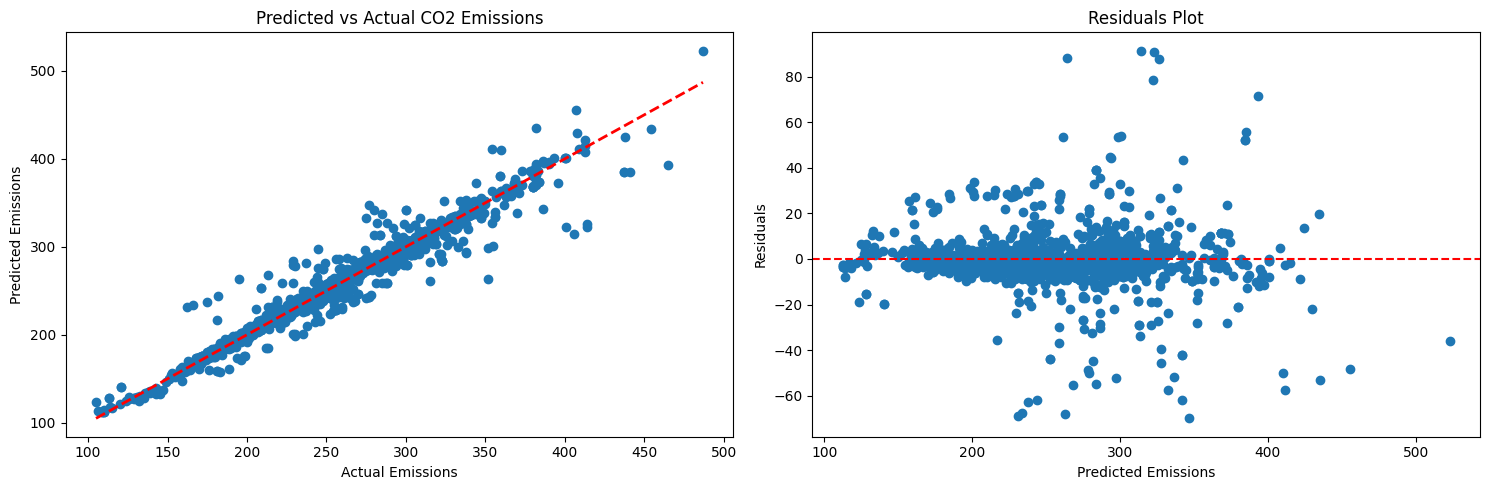

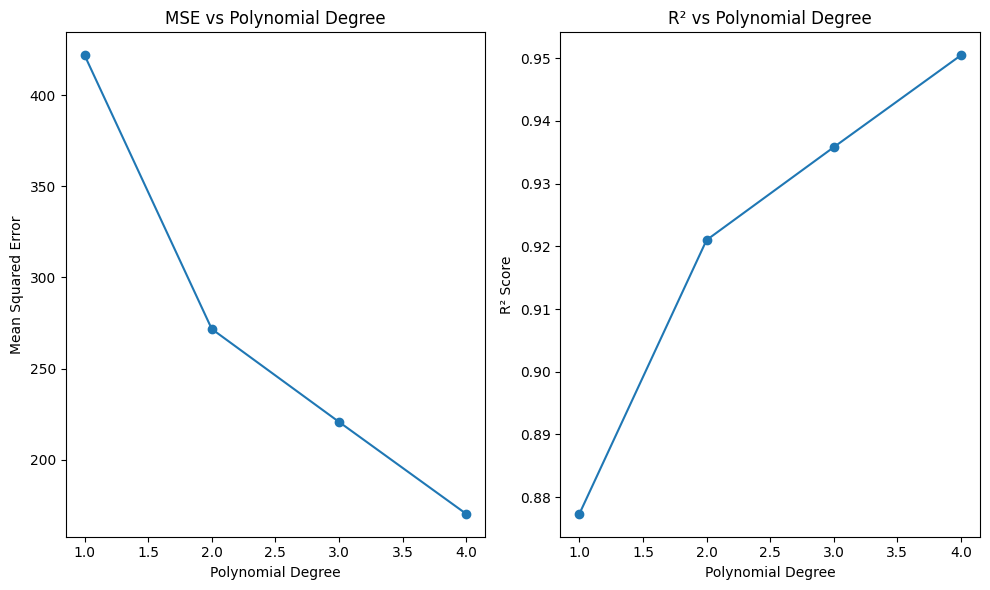

Missing Values:
Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions(g/km)                 0
dtype: int64

Polynomial Ridge Regression (Degree 2, α=1.0) Results:
Mean Squared Error: 271.52
Mean Absolute Error: 9.03
R-squared Score: 0.9211

Cross-Validation Results:
RMSE Scores: [21.62299356 17.2404325  13.72583849 16.41590342 12.54840752]
Mean CV RMSE: 16.31 (+/- 6.32)


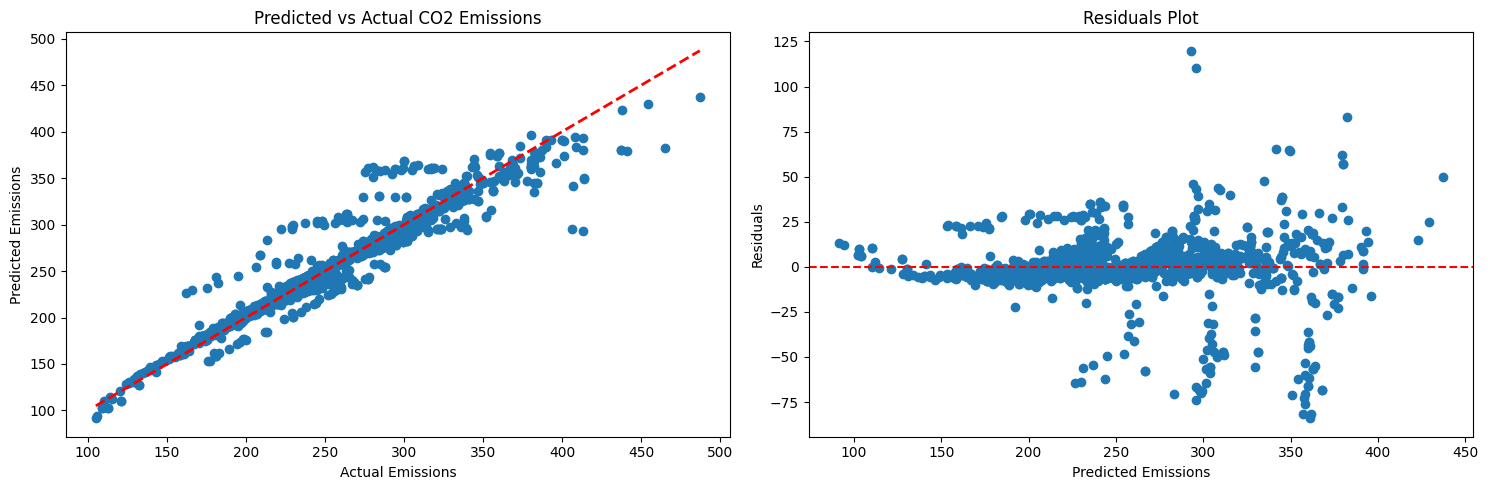

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Comprehensive Polynomial Regression Function
def polynomial_regression_analysis(df, degree=2, model_type='linear', alpha=1.0):
    """
    Perform polynomial regression with various options

    Parameters:
    - df: Input dataframe
    - degree: Polynomial feature degree (default 2)
    - model_type: 'linear' or 'ridge'
    - alpha: Regularization strength for Ridge regression

    Returns:
    - Trained model
    - Evaluation metrics
    - Predictions
    """

    features = [
        'Engine Size(L)',
        'Cylinders',
        'Fuel Consumption City (L/100 km)',
        'Fuel Consumption Hwy (L/100 km)',
        'Fuel Consumption Comb (L/100 km)'
    ]


    print("Missing Values:")
    print(df[features + ['CO2 Emissions(g/km)']].isnull().sum())


    df_cleaned = df.dropna(subset=features + ['CO2 Emissions(g/km)'])


    X = df_cleaned[features]
    y = df_cleaned['CO2 Emissions(g/km)']


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )


    if model_type == 'linear':
        poly_model = Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            ('regressor', LinearRegression())
        ])
        model_name = f"Polynomial Regression (Degree {degree})"
    elif model_type == 'ridge':
        poly_model = Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            ('regressor', Ridge(alpha=alpha))
        ])
        model_name = f"Polynomial Ridge Regression (Degree {degree}, α={alpha})"
    else:
        raise ValueError("model_type must be 'linear' or 'ridge'")


    poly_model.fit(X_train, y_train)


    y_pred = poly_model.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    cv_scores = cross_val_score(poly_model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)


    print(f"\n{model_name} Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared Score: {r2:.4f}")
    print("\nCross-Validation Results:")
    print(f"RMSE Scores: {cv_rmse_scores}")
    print(f"Mean CV RMSE: {cv_rmse_scores.mean():.2f} (+/- {cv_rmse_scores.std() * 2:.2f})")


    plt.figure(figsize=(15, 5))


    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Predicted vs Actual CO2 Emissions')
    plt.xlabel('Actual Emissions')
    plt.ylabel('Predicted Emissions')


    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.title('Residuals Plot')
    plt.xlabel('Predicted Emissions')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')

    plt.tight_layout()
    plt.show()

    return poly_model, {
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'cv_rmse': cv_rmse_scores
    }, y_pred


def compare_polynomial_degrees(df, max_degree=4):
    """
    Compare polynomial regression models with different degrees

    Parameters:
    - df: Input dataframe
    - max_degree: Maximum polynomial degree to test
    """
    results = {}


    for degree in range(1, max_degree + 1):
        print(f"\n--- Degree {degree} Polynomial Regression ---")
        model, metrics, _ = polynomial_regression_analysis(df, degree=degree)
        results[degree] = metrics


    plt.figure(figsize=(10, 6))
    degrees = list(results.keys())
    mse_values = [results[d]['mse'] for d in degrees]
    r2_values = [results[d]['r2'] for d in degrees]

    plt.subplot(1, 2, 1)
    plt.plot(degrees, mse_values, marker='o')
    plt.title('MSE vs Polynomial Degree')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Mean Squared Error')

    plt.subplot(1, 2, 2)
    plt.plot(degrees, r2_values, marker='o')
    plt.title('R² vs Polynomial Degree')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('R² Score')

    plt.tight_layout()
    plt.show()

    return results


compare_polynomial_degrees(df)

model, metrics, predictions = polynomial_regression_analysis(
    df,
    degree=2,
    model_type='ridge',
    alpha=1.0
)